In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
enc = LabelEncoder()

In [7]:
df1 = df.copy()

In [8]:
df1['sex'] = enc.fit_transform(df['sex'])
df1['smoker'] = enc.fit_transform(df['smoker'])
df1['region'] = enc.fit_transform(df['region'])

In [9]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('charges', axis=1), df1['charges'],\
                                                    test_size=0.2, random_state=42)

In [12]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7833463107364539

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_train, model.predict(X_train))

0.7417049283233981

In [16]:
r2_score(y_test, y_pred)

0.7833463107364539

Text(0.5, 1.0, 'Linear Regression with Label Encoding and Polynomial Features) (R^2-score = 0.7833463107364539)')

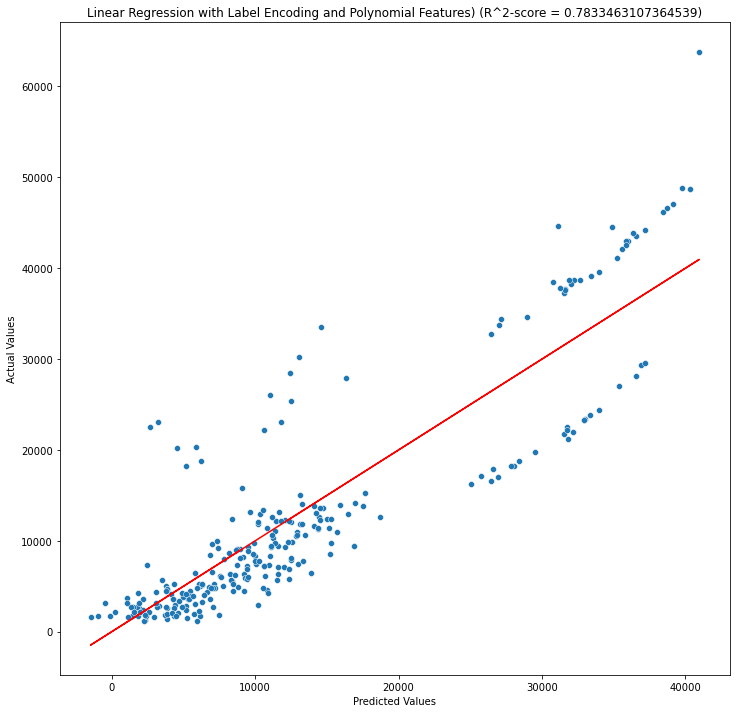

In [17]:
plt.figure(figsize=(12,12))
sns.scatterplot(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(y_pred, y_pred, color='red')
plt.title('Linear Regression with Label Encoding and Polynomial Features) (R^2-score = {})'.format(model.score(X_test, y_test)))

In [18]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [19]:
check_min_max(y_pred)

Predicted values

max: 40959.081721642135
min: -1483.1528181468348

Actual values

max: 63770.42801
min: 1131.5066


In [20]:
#trying with polynomial features 

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures()
df2 = poly.fit_transform(df1.copy().drop('charges', axis=1))

In [23]:
df2

array([[ 1., 19.,  0., ...,  1.,  3.,  9.],
       [ 1., 18.,  1., ...,  0.,  0.,  4.],
       [ 1., 28.,  1., ...,  0.,  0.,  4.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  4.],
       [ 1., 21.,  0., ...,  0.,  0.,  9.],
       [ 1., 61.,  0., ...,  1.,  1.,  1.]])

In [24]:
df1.drop('charges', axis=1).columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [25]:
len(poly.get_feature_names())

28

In [26]:
df3 = pd.DataFrame(df2, columns=poly.get_feature_names())

In [27]:
df3.head()

,1,x0,x1,x2,x3,x4,x5,x0^2,x0 x1,x0 x2,...,x2^2,x2 x3,x2 x4,x2 x5,x3^2,x3 x4,x3 x5,x4^2,x4 x5,x5^2
0,1.0,19.0,0.0,27.900,0.0,1.0,3.0,361.0,0.0,530.100,...,778.410000,0.00,27.9,83.700,0.0,0.0,0.0,1.0,3.0,9.0
1,1.0,18.0,1.0,33.770,1.0,0.0,2.0,324.0,18.0,607.860,...,1140.412900,33.77,0.0,67.540,1.0,0.0,2.0,0.0,0.0,4.0
2,1.0,28.0,1.0,33.000,3.0,0.0,2.0,784.0,28.0,924.000,...,1089.000000,99.00,0.0,66.000,9.0,0.0,6.0,0.0,0.0,4.0
3,1.0,33.0,1.0,22.705,0.0,0.0,1.0,1089.0,33.0,749.265,...,515.517025,0.00,0.0,22.705,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,32.0,1.0,28.880,0.0,0.0,1.0,1024.0,32.0,924.160,...,834.054400,0.00,0.0,28.880,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
df3['charges'] = df1['charges'].copy()

In [29]:
df3.head()

,1,x0,x1,x2,x3,x4,x5,x0^2,x0 x1,x0 x2,...,x2 x3,x2 x4,x2 x5,x3^2,x3 x4,x3 x5,x4^2,x4 x5,x5^2,charges
0,1.0,19.0,0.0,27.900,0.0,1.0,3.0,361.0,0.0,530.100,...,0.00,27.9,83.700,0.0,0.0,0.0,1.0,3.0,9.0,16884.92400
1,1.0,18.0,1.0,33.770,1.0,0.0,2.0,324.0,18.0,607.860,...,33.77,0.0,67.540,1.0,0.0,2.0,0.0,0.0,4.0,1725.55230
2,1.0,28.0,1.0,33.000,3.0,0.0,2.0,784.0,28.0,924.000,...,99.00,0.0,66.000,9.0,0.0,6.0,0.0,0.0,4.0,4449.46200
3,1.0,33.0,1.0,22.705,0.0,0.0,1.0,1089.0,33.0,749.265,...,0.00,0.0,22.705,0.0,0.0,0.0,0.0,0.0,1.0,21984.47061
4,1.0,32.0,1.0,28.880,0.0,0.0,1.0,1024.0,32.0,924.160,...,0.00,0.0,28.880,0.0,0.0,0.0,0.0,0.0,1.0,3866.85520


In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df3.drop('charges', axis=1), df3['charges'],\
                                                    test_size=0.2, random_state=42)

In [31]:
model2 = LinearRegression().fit(X_train2, y_train2)
model2.score(X_test2, y_test2)

0.864921827342331

In [32]:
y_pred2 = model2.predict(X_test2)

In [33]:
r2_score(y_train2, model2.predict(X_train2))

0.8374016449165917

In [34]:
r2_score(y_test2, y_pred2)

0.864921827342331

Text(0.5, 1.0, 'Linear Regression with Label Encoding and Polynomial Features) (R^2-score = 0.864921827342331)')

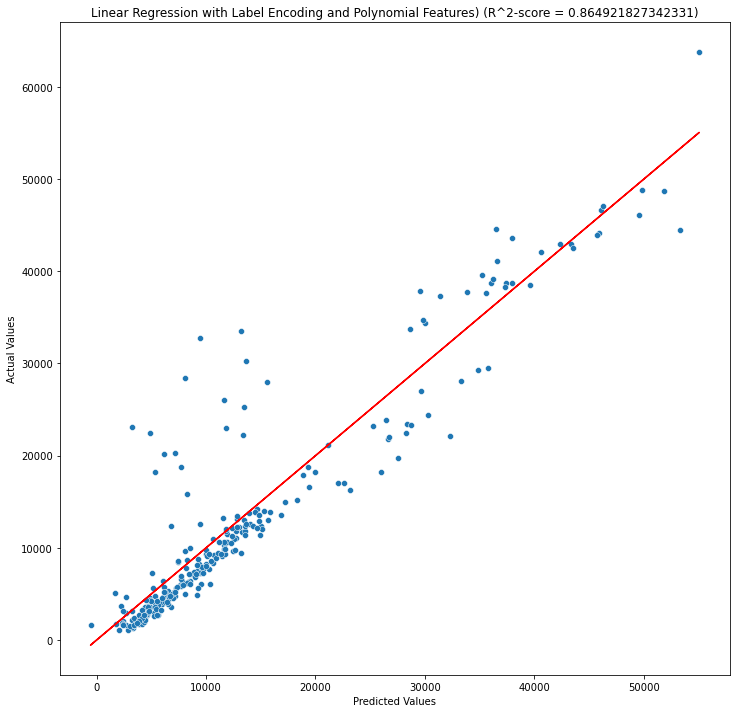

In [35]:
plt.figure(figsize=(12,12))
sns.scatterplot(y_pred2, y_test2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(y_pred2, y_pred2, color='red')
plt.title('Linear Regression with Label Encoding and Polynomial Features) (R^2-score = {})'.format(model2.score(X_test2, y_test2)))

In [36]:
check_min_max(y_pred2)

Predicted values

max: 55062.40625
min: -549.671875

Actual values

max: 63770.42801
min: 1131.5066


In [37]:
#comparting with and w/o poly features 

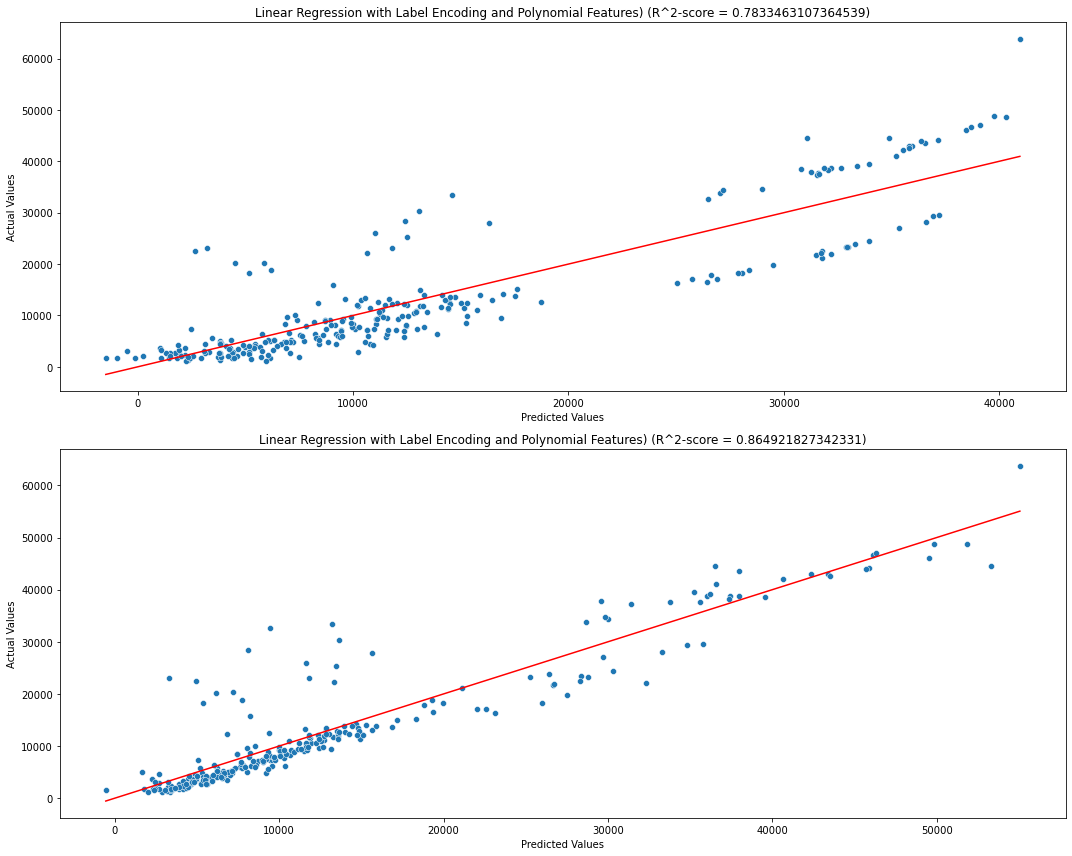

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(y_pred, y_test, ax=axs[0])
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Actual Values')
sns.lineplot(y_pred, y_pred, color='red', ax=axs[0])
axs[0].set_title('Linear Regression with Label Encoding and Polynomial Features) (R^2-score = {})'.format(model.score(X_test, y_test)))

#2nd plot 
sns.scatterplot(y_pred2, y_test2, ax=axs[1])
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Actual Values')
sns.lineplot(y_pred2, y_pred2, color='red', ax=axs[1])
axs[1].set_title('Linear Regression with Label Encoding and Polynomial Features) (R^2-score = {})'.format(model2.score(X_test2, y_test2)))
plt.tight_layout()

In [39]:
#lets try linear regression with normalization

In [40]:
model3 = LinearRegression(normalize=True).fit(X_train2, y_train2)

In [41]:
y_pred3 = model3.predict(X_test2)

In [42]:
r2_score(y_train2, model3.predict(X_train2))

0.8396524198452325

In [43]:
r2_score(y_test2, y_pred3)

0.867510350003526

Text(0.5, 1.0, 'Linear Regression with Label Encoding and Polynomial Features with normalization (R^2-score = 0.867510350003526)')

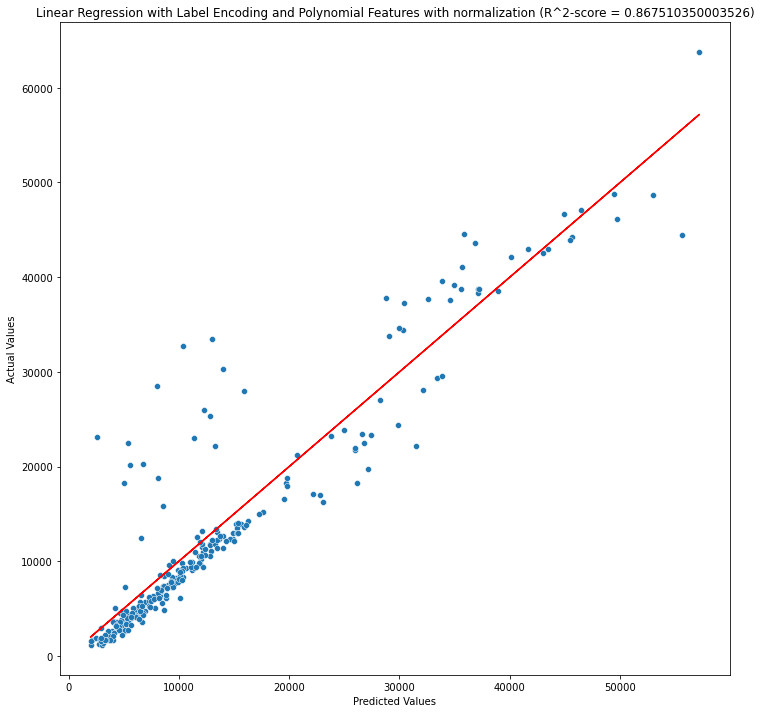

In [44]:
plt.figure(figsize=(12,12))
sns.scatterplot(y_pred3, y_test2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(y_pred3, y_pred3, color='red')
plt.title('Linear Regression with Label Encoding and Polynomial Features with normalization (R^2-score = {})'.format(model3.score(X_test2, y_test2)))

In [45]:
check_min_max(y_pred3)

Predicted values

max: 57179.3246940952
min: 1983.2446547218906

Actual values

max: 63770.42801
min: 1131.5066


In [46]:
#normalization fixes the issue of negative charge prediction 

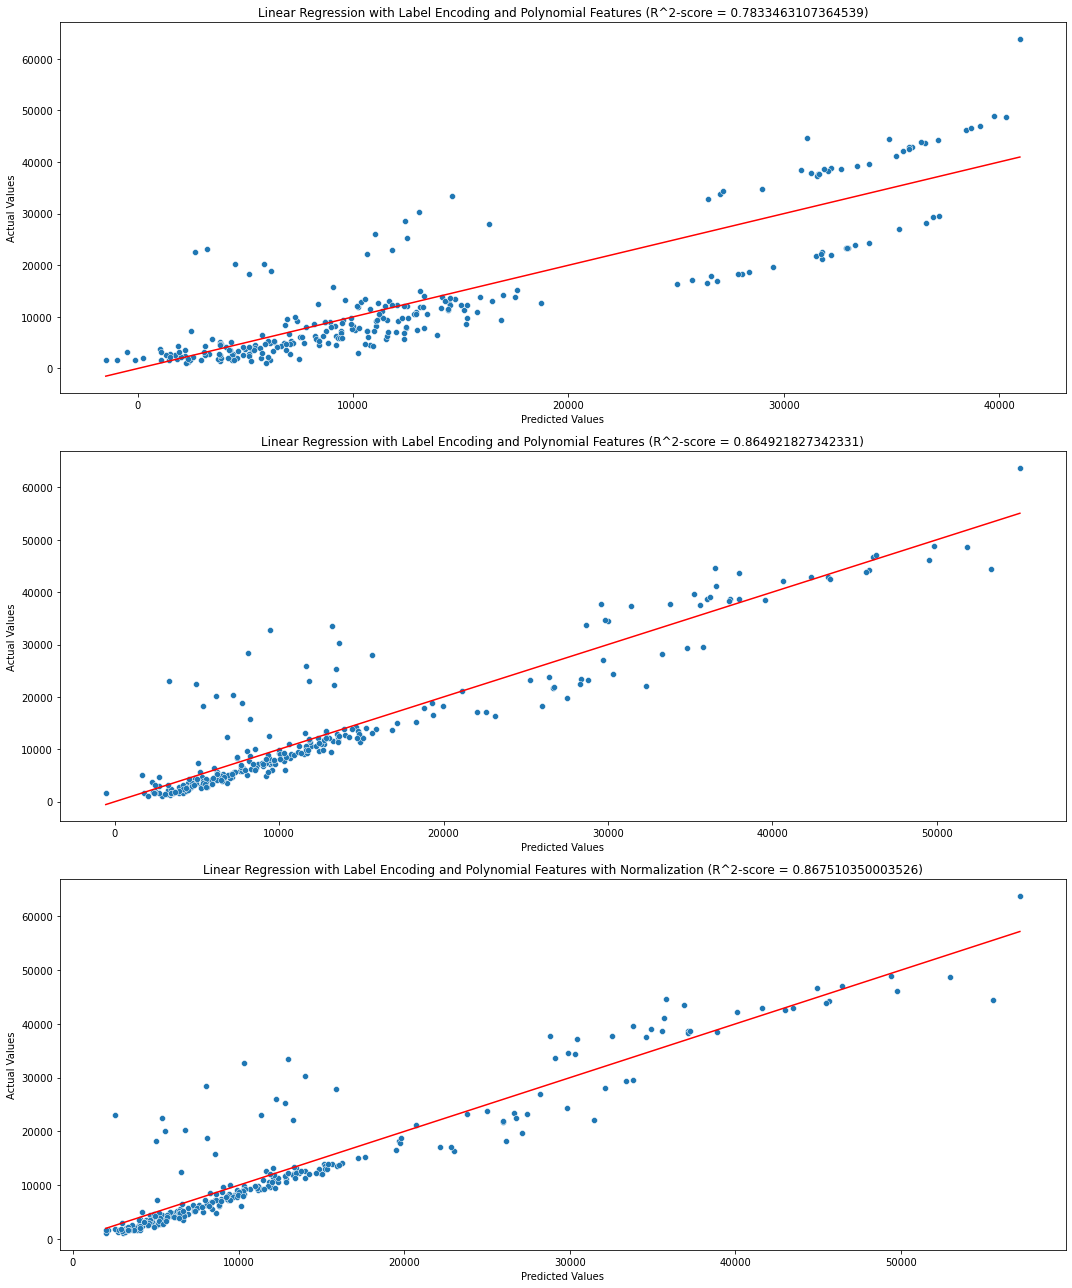

In [49]:
fig, axs = plt.subplots(3, 1, figsize=(15,18))
#1st plot
sns.scatterplot(y_pred, y_test, ax=axs[0])
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Actual Values')
sns.lineplot(y_pred, y_pred, color='red', ax=axs[0])
axs[0].set_title('Linear Regression with Label Encoding and Polynomial Features (R^2-score = {})'.format(model.score(X_test, y_test)))

#2nd plot 
sns.scatterplot(y_pred2, y_test2, ax=axs[1])
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Actual Values')
sns.lineplot(y_pred2, y_pred2, color='red', ax=axs[1])
axs[1].set_title('Linear Regression with Label Encoding and Polynomial Features (R^2-score = {})'.format(model2.score(X_test2, y_test2)))

#3nd plot 
sns.scatterplot(y_pred3, y_test2, ax=axs[2])
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Actual Values')
sns.lineplot(y_pred3, y_pred3, color='red', ax=axs[2])
axs[2].set_title('Linear Regression with Label Encoding and Polynomial Features with Normalization (R^2-score = {})'.format(model3.score(X_test2, y_test2)))

plt.tight_layout()

In [48]:
#try from sklearn.ensemble import RandomForrestRegressor